In [39]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [40]:
data = pd.read_excel("data.xlsx")

In [41]:
data

,D2EHPA concentration,pH,Temperature,b-ala conc (g/L),Incubation time (H),Phase ratio,Efficiency
0,10.000,6.580,30.000,100.000,12.000,1.000,13.907744
1,30.000,6.580,30.000,100.000,12.000,1.000,36.031031
2,50.000,6.580,30.000,100.000,12.000,1.000,58.257838
3,60.000,6.580,30.000,100.000,12.000,1.000,65.993744
4,70.000,6.580,30.000,100.000,12.000,1.000,75.355771
...,...,...,...,...,...,...,...
88,73.079,74.079,75.079,76.079,77.079,78.079,79.079000
89,74.079,75.079,76.079,77.079,78.079,79.079,80.079000
90,75.079,76.079,77.079,78.079,79.079,80.079,81.079000
91,76.079,77.079,78.079,79.079,80.079,81.079,82.079000


In [42]:
X=data.iloc[:,:-1]
Y=data.iloc[:,-1]

In [43]:
print(X.min())

D2EHPA concentration    10.000000
pH                       3.000000
Temperature             20.000000
b-ala conc (g/L)         1.000000
Incubation time (H)      0.016667
Phase ratio              0.100000
dtype: float64


In [44]:
print(X.max())

D2EHPA concentration     90.000
pH                       78.079
Temperature              79.079
b-ala conc (g/L)        200.000
Incubation time (H)      81.079
Phase ratio              82.079
dtype: float64


In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,random_state=1)

In [46]:
from sklearn.linear_model import LinearRegression

In [47]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [48]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [49]:
y_pred = model.predict(X)

In [50]:
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

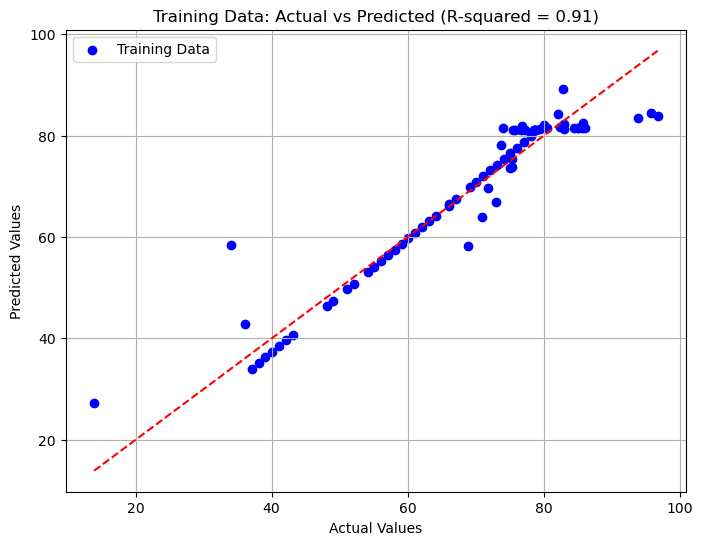

In [51]:
plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_train_pred, color='blue', label='Training Data')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linestyle='--')
plt.title(f'Training Data: Actual vs Predicted (R-squared = {train_r2:.2f})')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

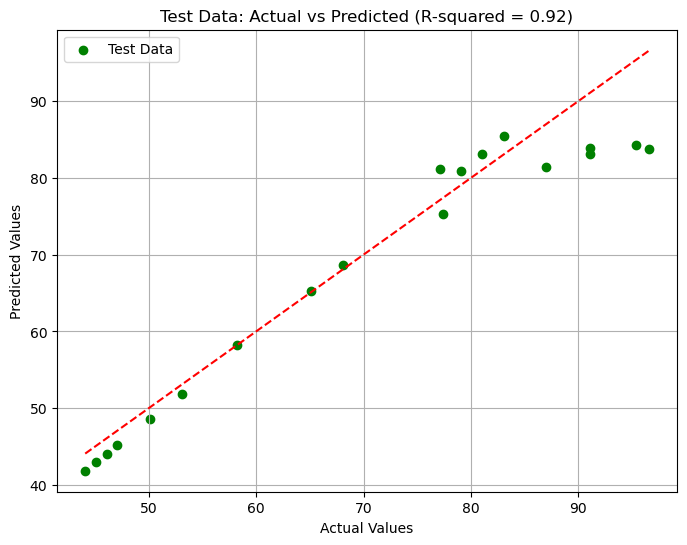

In [52]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, color='green', label='Test Data')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title(f'Test Data: Actual vs Predicted (R-squared = {test_r2:.2f})')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

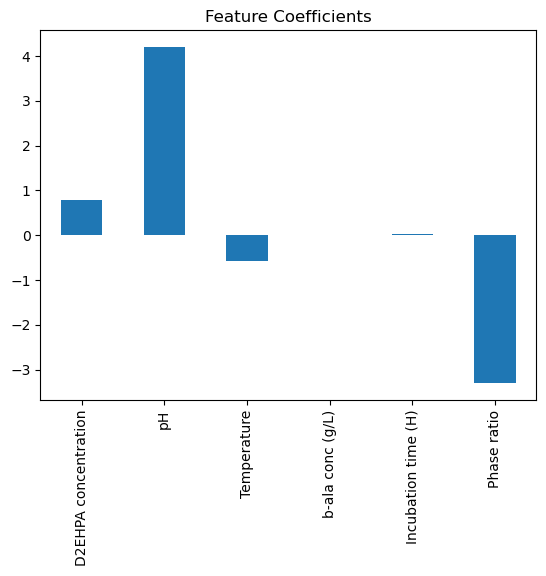

In [68]:
coefficients = pd.Series(model.coef_, index=X.columns)
coefficients.plot(kind='bar')
plt.title("Feature Coefficients")
plt.show()

In [53]:
export_data = {'Original': Y, 'Predicted': y_pred}
df_export = pd.DataFrame(export_data)

In [54]:
df_export.to_excel('output.xlsx', index=False)

In [55]:
from sklearn.metrics import mean_squared_error, r2_score

In [56]:
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

In [57]:
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

In [58]:
print(f'Training MSE: {mse_train:.2f}, R-squared: {r2_train:.2f}')
print(f'Testing MSE: {mse_test:.2f}, R-squared: {r2_test:.2f}')

Training MSE: 25.43, R-squared: 0.91
Testing MSE: 25.75, R-squared: 0.92


In [59]:
coefficients = model.coef_
intercept = model.intercept_

In [60]:
print(coefficients,intercept)

[ 0.77400916  4.20017686 -0.57236688 -0.0051026   0.01948847 -3.29938861] 12.699337372707383


In [61]:
#optimising to find the optimal input parameters

In [62]:
from gekko import GEKKO
m = GEKKO()

In [63]:
# Initialize variables
x1 = m.Var(value=1,lb=0,ub=10) 
x2 = m.Var(value=1,lb=0,ub=10) 
x3 = m.Var(value=1,lb=0,ub=10) 
x4 = m.Var(value=1,lb=0,ub=10) 
x5 = m.Var(value=1,lb=0,ub=10) 
x6 = m.Var(value=1,lb=0,ub=10) 

In [64]:
# Init the coefficients
c = m.Const(value=12.699) 
m1 = m.Const(value=0.774) 
m2 = m.Const(value=4.20)
m3 = m.Const(value=-0.572) 
m4 = m.Const(value=-0.005)
m5 = m.Const(value=0.019) 
m6 = m.Const(value=-3.299)

In [65]:
# Inequality constraints from input data
m.Equation(x1 > 10)
m.Equation(x2 >= 3)
m.Equation(x2 <= 14)
m.Equation(x3 > 0)
m.Equation(x4 > 0)
m.Equation(x5 > 0)
m.Equation(x6 > 0)

In [66]:
#setting the objective function
m.Obj(m1*x1+m2*x2+m3*x3+m4*x4+m5*x5+m6*x6+c) # Objective
m.options.IMODE = 2
m.solve(disp=False)

In [67]:
print('Results')
print('x1(D2EHPA concentration): ' + str(x1.value))
print('x2(ph): ' + str(x2.value))
print('x3(temp): ' + str(x3.value))
print('x4(b-ala conc): ' + str(x4.value))
print('x5(incubation time): ' + str(x5.value))
print('x6(phase ratio): ' + str(x6.value))

Results
x1(D2EHPA concentration): [10.0]
x2(ph): [2.9999999998]
x3(temp): [10.0]
x4(b-ala conc): [9.9999917465]
x5(incubation time): [4.3380441999e-06]
x6(phase ratio): [10.0]
